For p=0.5, n=50:
Expectation (Mean): 25.0
Variance: 12.5


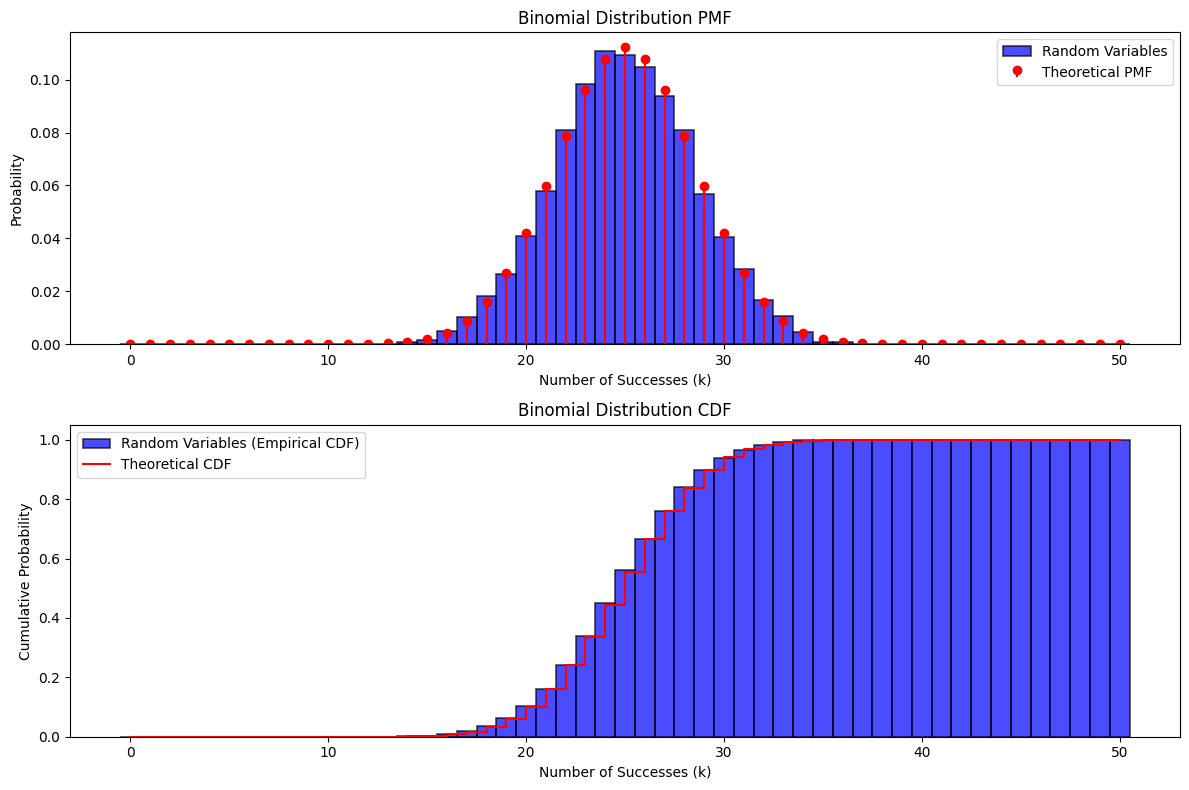

For p=0.5, n=5:
Expectation (Mean): 2.5
Variance: 1.25
For p=0.5, n=50:
Expectation (Mean): 25.0
Variance: 12.5
For p=0.1, n=60:
Expectation (Mean): 6.0
Variance: 5.4
For p=0.5, n=60:
Expectation (Mean): 30.0
Variance: 15.0


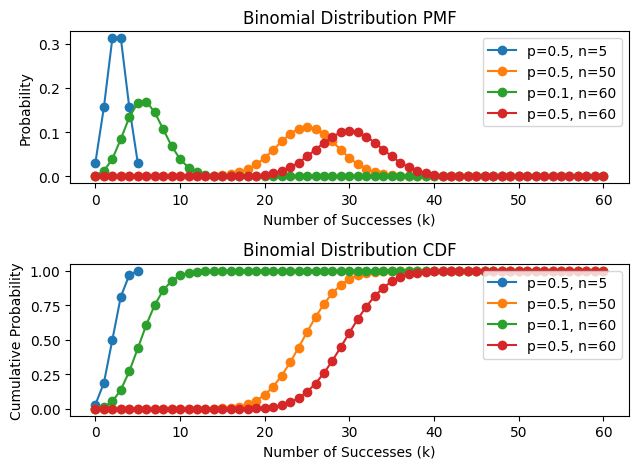

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate binomial CDF
def binomial_cdf(k, n, p):
    cdf_value = 0
    for i in range(k + 1):
        cdf_value += comb(n, i) * (p ** i) * ((1 - p) ** (n - i))
    return cdf_value

# Function to calculate binomial expectation (mean)
def binomial_expectation(n, p):
    return n * p

# Function to calculate binomial variance
def binomial_variance(n, p):
    return n * p * (1 - p)

parametersx = [(0.5, 50)]
parametersy = [(0.5, 5), (0.5, 50), (0.1, 60), (0.5, 60)]

for p, n in parametersx:
    # Generate 1000 random binomial variables
    binomial_random_variables = np.random.binomial(n, p, 10000)

    k_values = np.arange(0, n+1)
    pmf_values = [binomial_pmf(k, n, p) for k in k_values]
    cdf_values = [binomial_cdf(k, n, p) for k in k_values]

    # Calculate expectation and variance using generated data
    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)

    # Plot PMF
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.hist(binomial_random_variables, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2, label='Random Variables')
    plt.stem(k_values, pmf_values, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical PMF')
    plt.title('Binomial Distribution PMF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

    # Plot CDF
    plt.subplot(2, 1, 2)
    plt.hist(binomial_random_variables, bins=np.arange(-0.5, n+1.5, 1), density=True, cumulative=True, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2, label='Random Variables (Empirical CDF)')
    plt.step(k_values, cdf_values, color='red', where='post', label='Theoretical CDF')
    plt.title('Binomial Distribution CDF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Cumulative Probability')
    plt.legend()

    # Print expectation and variance
    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")

    plt.tight_layout()
    plt.show()

for p, n in parametersy:
    k_values = np.arange(0, n+1)
    pmf_values = [binomial_pmf(k, n, p) for k in k_values]
    cdf_values = [binomial_cdf(k, n, p) for k in k_values]

    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)
    # Plot PMF
    plt.subplot(2, 1, 1)
    plt.plot(k_values, pmf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution PMF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

    # Plot CDF
    plt.subplot(2, 1, 2)
    plt.plot(k_values, cdf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution CDF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Cumulative Probability')
    plt.legend()

    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")
    

plt.tight_layout()
plt.show()